# Spotify Project
PROJECT WORK IN SF2935: MUSIC CLASSIFICATION

#### Preprocessing

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split

In [34]:
#Loading the data into a dataframe.
df = pd.read_csv ('project_train.csv')
df_test = pd.read_csv('project_test.csv')
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Label
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,0.533960,2.084912,5.150495,-21.746783,0.667327,0.104032,0.316158,0.186913,0.212621,0.473778,114.045600,0.500990
std,0.188161,32.635821,3.665736,290.809581,0.471638,0.113225,0.370039,0.344825,0.200281,0.268268,27.313063,0.500495
min,0.084900,0.009790,0.000000,-6542.000000,0.000000,0.022600,0.000024,0.000000,0.022400,0.024200,44.777000,0.000000
25%,0.371000,0.430000,1.000000,-9.844000,0.000000,0.036100,0.020100,0.000000,0.093400,0.237000,92.163000,0.000000
50%,0.557000,0.734000,5.000000,-5.852000,1.000000,0.046700,0.116000,0.000041,0.134000,0.474000,113.122000,1.000000
75%,0.686000,0.875000,8.000000,-4.436000,1.000000,0.135000,0.594000,0.085700,0.265000,0.699000,130.008000,1.000000
max,0.940000,734.000000,11.000000,4.331000,1.000000,0.925000,0.996000,0.994000,0.992000,0.969000,210.752000,1.000000


In [35]:
df_test.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000
mean,0.559613,0.683124,5.693333,-7.834880,0.613333,0.103161,0.229506,0.037075,0.232309,0.511425,119.250027
std,0.159323,0.228939,3.537343,4.562421,0.490266,0.104776,0.242360,0.159394,0.224458,0.238504,28.379643
min,0.136000,0.033400,0.000000,-27.654000,0.000000,0.023900,0.000021,0.000000,0.033700,0.075900,46.771000
25%,0.483500,0.575500,2.000000,-9.077500,0.000000,0.037950,0.034750,0.000000,0.094850,0.316000,98.994000
50%,0.557000,0.752000,6.000000,-6.653000,1.000000,0.050500,0.130000,0.000002,0.132000,0.517000,120.034000
75%,0.690500,0.860000,9.000000,-4.996000,1.000000,0.115500,0.382500,0.000499,0.298500,0.674000,138.534000
max,0.825000,0.995000,11.000000,-2.252000,1.000000,0.446000,0.968000,0.946000,0.987000,0.965000,174.209000


In [36]:
#Given the attributes from spotify we have two clear outliers.

df.drop(df.loudness.idxmin(), inplace=True)
#df.drop(df.loudness.idxmax(), inplace=True)
df.drop(df.energy.idxmax(), inplace=True)

In [37]:
# Concat dataset
train_len = len(df)
dataset = pd.concat(objs=[df, df_test], axis=0).reset_index(drop=True)
dataset.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Label
count,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,503.000000
mean,0.536917,0.638924,5.237024,-8.690641,0.660900,0.104082,0.305199,0.168117,0.215336,0.477380,114.597175,0.499006
std,0.184942,0.295034,3.646543,6.830188,0.473814,0.112236,0.357717,0.331003,0.203681,0.264205,27.449324,0.500497
min,0.084900,0.009790,0.000000,-36.252000,0.000000,0.022600,0.000021,0.000000,0.022400,0.024200,44.777000,0.000000
25%,0.388250,0.445750,2.000000,-9.688000,0.000000,0.036300,0.022475,0.000000,0.093825,0.242250,92.819750,0.000000
50%,0.556500,0.734000,5.000000,-5.941500,1.000000,0.047250,0.117000,0.000030,0.134000,0.478000,113.726500,0.000000
75%,0.686000,0.873000,8.750000,-4.497750,1.000000,0.130250,0.553750,0.023925,0.270250,0.686000,130.173000,1.000000
max,0.940000,0.997000,11.000000,4.331000,1.000000,0.925000,0.996000,0.994000,0.992000,0.969000,210.752000,1.000000


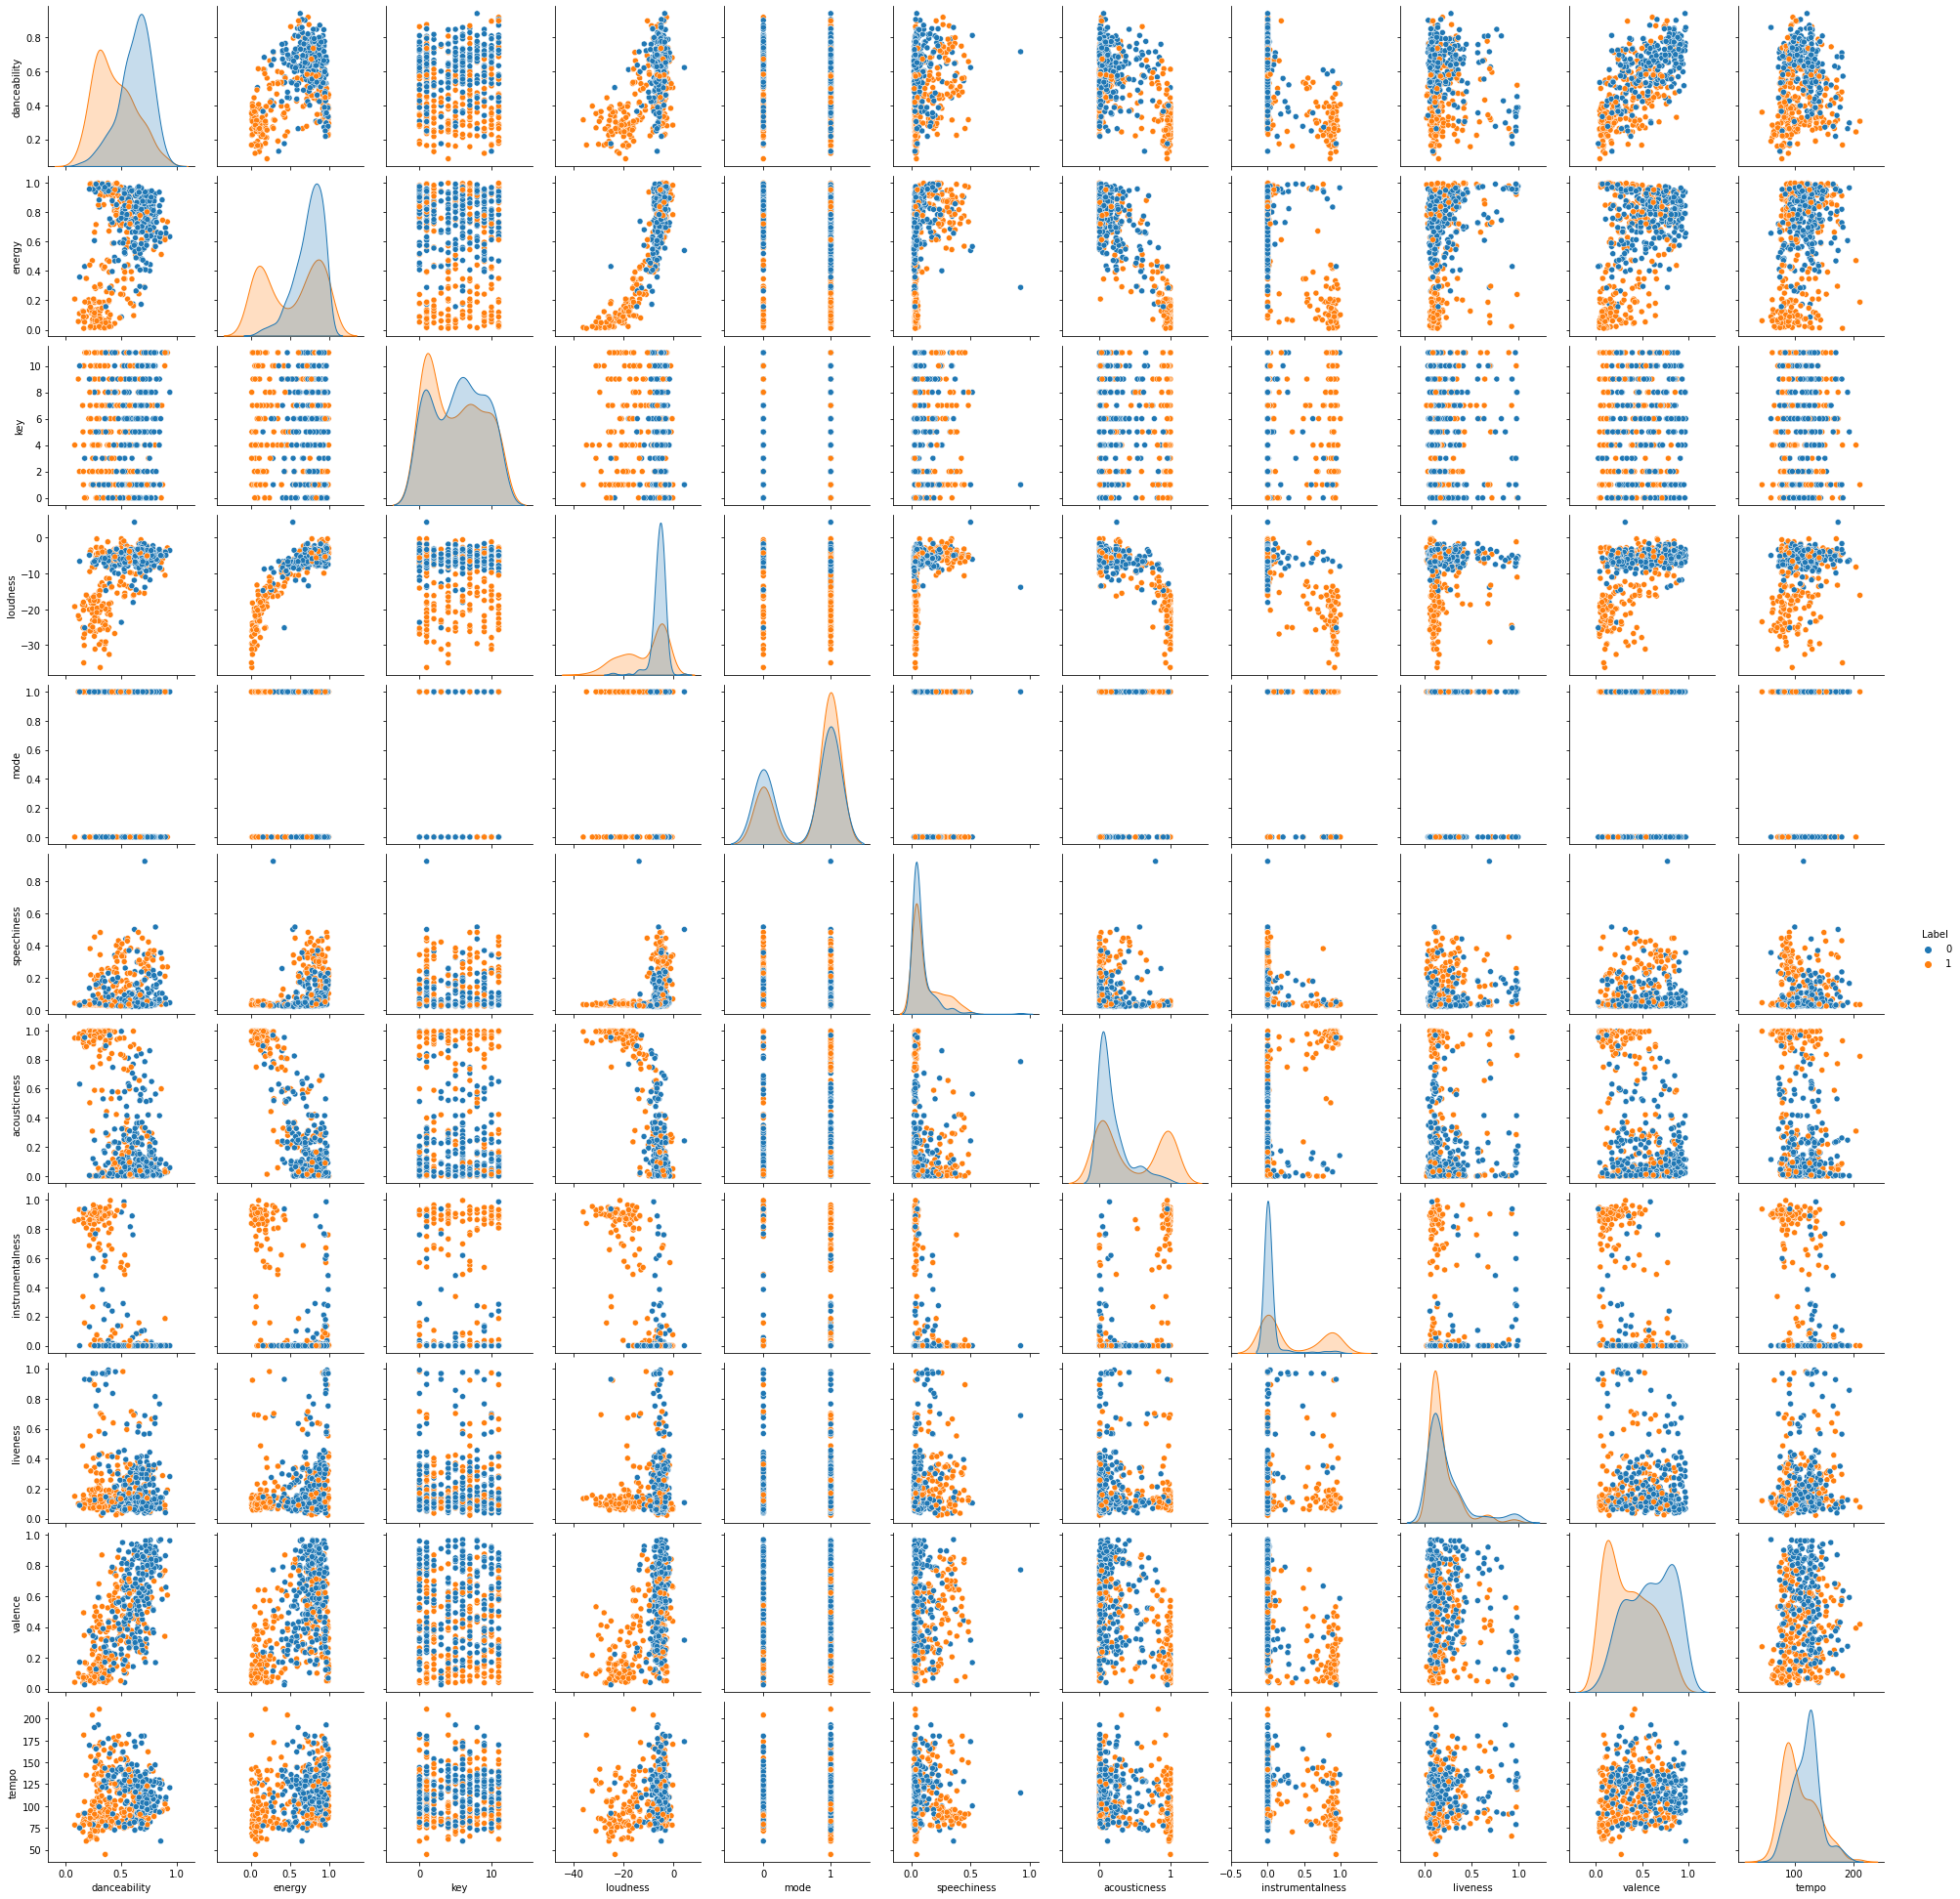

In [12]:
#Distribution of attributes 
sns.pairplot(data=df, vars=df.columns[:-1], hue='Label')
plt.savefig('pairplot.png')

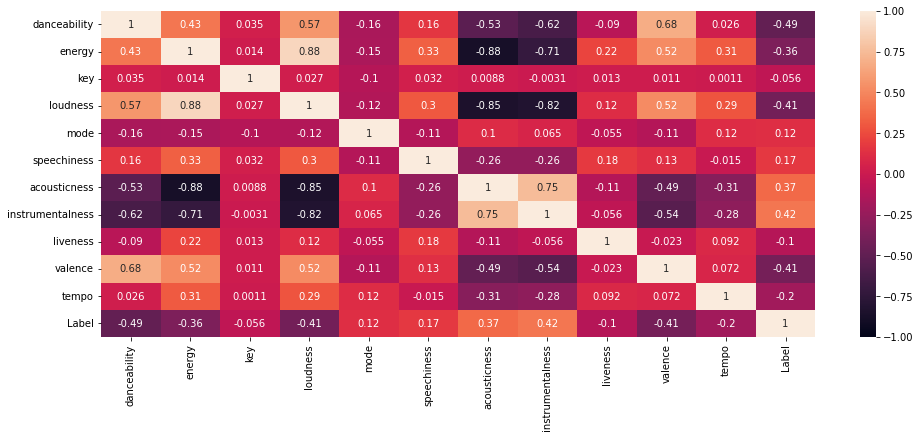

In [38]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

Energy/acousticness attributes falls just below r^2 > 0.9 but it could be intresting to lower this threshold and remove acousticness/energy.

In [39]:
Labels = dataset.pop('Label')

In [40]:
dataset.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000
mean,0.536917,0.638924,5.237024,-8.690641,0.660900,0.104082,0.305199,0.168117,0.215336,0.477380,114.597175
std,0.184942,0.295034,3.646543,6.830188,0.473814,0.112236,0.357717,0.331003,0.203681,0.264205,27.449324
min,0.084900,0.009790,0.000000,-36.252000,0.000000,0.022600,0.000021,0.000000,0.022400,0.024200,44.777000
25%,0.388250,0.445750,2.000000,-9.688000,0.000000,0.036300,0.022475,0.000000,0.093825,0.242250,92.819750
50%,0.556500,0.734000,5.000000,-5.941500,1.000000,0.047250,0.117000,0.000030,0.134000,0.478000,113.726500
75%,0.686000,0.873000,8.750000,-4.497750,1.000000,0.130250,0.553750,0.023925,0.270250,0.686000,130.173000
max,0.940000,0.997000,11.000000,4.331000,1.000000,0.925000,0.996000,0.994000,0.992000,0.969000,210.752000


#### Feature Analysis
Invetigate if decorrelation could imporve a basemodel prediction.

In [41]:
dataset['liveness_low'] = dataset['liveness'].map(lambda s: s if s <= 0.5 else 0)
dataset['liveness_high'] = dataset['liveness'].map(lambda s: s if s > 0.5 else 0)
dataset.drop(columns=['liveness'],inplace=True)

dataset['instrumentalness_low'] = dataset['instrumentalness'].map(lambda s: s if s <= 0.5 else 0)
dataset['instrumentalness_high'] = dataset['instrumentalness'].map(lambda s: s if s > 0.5 else 0)
dataset.drop(columns=['instrumentalness'],inplace=True)

dataset['danceability_low'] = dataset['danceability'].map(lambda s: s if s <= 0.5 else 0)
dataset['danceability_high'] = dataset['danceability'].map(lambda s: s if s > 0.5 else 0)
dataset.drop(columns=['danceability'],inplace=True)

dataset['energy_low'] = dataset['energy'].map(lambda s: 1 if s <= 0.4 else 0)
dataset['energy_high'] = dataset['energy'].map(lambda s: 1 if s > 0.4 else 0)
dataset.drop(columns=['energy'],inplace=True)

dataset['acousticness_low'] = dataset['acousticness'].map(lambda s: s if s <= 0.5 else 0)
#dataset['acoustiness_medium'] = dataset['acousticness'].map(lambda s: s if  (s > 0.4 and s <0.8) else 0)
dataset['acousticness_high'] = dataset['acousticness'].map(lambda s: s if s > 0.5 else 0)
dataset.drop(columns=['acousticness'],inplace=True)

#dataset['speechiness_low'] = dataset['speechiness'].map(lambda s: s if s <= 0.33 else 0)
#dataset['speechiness_medium'] = dataset['speechiness'].map(lambda s: s if  (s > 0.33 and s <=0.66) else 0)
#dataset['speechiness_high'] = dataset['speechiness'].map(lambda s: s if s > 0.33 else 0)
#dataset.drop(columns=['speechiness'],inplace=True)

dataset['valence_low'] = dataset['valence'].map(lambda s: s if s <= 0.5 else 0)
#dataset['valence_medium'] = dataset['valence'].map(lambda s: s if  (s > 0.4 and s <0.8) else 0)
dataset['valence_high'] = dataset['valence'].map(lambda s: s if s > 0.5 else 0)
dataset.drop(columns=['valence'],inplace=True)

dataset['tempo_low'] = dataset['tempo'].map(lambda s: 1 if s <= 110 else 0)
dataset['tempo_high'] = dataset['tempo'].map(lambda s: 1 if s > 110 else 0)
dataset.drop(columns=['tempo'],inplace=True)

dataset['loudness_low'] = dataset['loudness'].map(lambda s: s if s < -12 else 0)
dataset['loudness_high'] = dataset['loudness'].map(lambda s: s if s >= -12 else 0)
dataset.drop(columns=['loudness'],inplace=True)

dataset['key']=(dataset['key']-dataset['key'].min())/(dataset['key'].max()-dataset['key'].min())
#dataset.drop(columns=['key'],inplace=True)

In [42]:
dataset = (dataset-dataset.mean())/dataset.std()

In [43]:
X_train = dataset[:train_len]
y_train = Labels[:train_len]
X_test = dataset[train_len:]
print(X_train,y_train,X_test)

          key      mode  speechiness  liveness_low  liveness_high  \
0   -0.065000 -1.394850     2.342544      2.078683      -0.300966   
1    0.483465  0.715682     2.128709      1.170401      -0.300966   
2   -0.065000  0.715682     2.511831     -0.168612      -0.300966   
3   -0.339232 -1.394850     1.407015      0.524304      -0.300966   
4    1.580394 -1.394850     1.469384      0.402575      -0.300966   
..        ...       ...          ...           ...            ...   
498  1.580394  0.715682     0.952615     -0.548779      -0.300966   
499 -1.436161  0.715682    -0.679661     -0.607771      -0.300966   
500 -1.436161  0.715682    -0.591454      0.205937      -0.300966   
501  1.306162 -1.394850     1.130811      2.013136      -0.300966   
502  1.031930  0.715682    -0.614619     -0.355886      -0.300966   

     instrumentalness_low  instrumentalness_high  danceability_low  \
0               -0.220927              -0.471446         -0.750536   
1               -0.220927      

Conclusion: KNN benifitted from removing tempo, SVM none, LR from energy/valence. Hence it will depend alot from model to model. We will continue with all attributes in the dataset.  

## Classification / model building

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [45]:
kfold = StratifiedKFold(n_splits=3)

/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/u

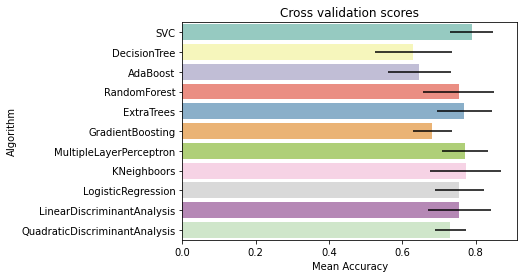

In [46]:
# Modeling step Test differents algorithms 
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())
classifiers.append(QuadraticDiscriminantAnalysis())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis","QuadraticDiscriminantAnalysis"]})

g = sns.barplot(data = cv_res,x="CrossValMeans",y="Algorithm", palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")
plt.savefig('modelcomp.png')

#### SVM

In [15]:
# defining parameter range
param_grid = {'C': [0.01,0.1,0.5,1,10,50,100], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf'],
              } 
  
gsSVMC = GridSearchCV(SVC(probability=True), param_grid,cv=kfold,scoring="accuracy", refit = True, verbose = 1)
  
# fitting the model for grid search
gsSVMC.fit(X_train, y_train)

SVMC_best = gsSVMC.best_estimator_

# Best score
print('Best model:',gsSVMC.best_estimator_)
print('Score:',gsSVMC.best_score_)

Fitting 3 folds for each of 35 candidates, totalling 105 fits
Best model: SVC(C=1, gamma=0.1, probability=True)
Score: 0.7853340937173273


#### Random Forest

In [18]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()

## Search grid for optimal parameters 
rf_param_grid = {"max_depth": [None, 4,5,6,7,8],
              "max_features": ['log2','sqrt'],
              #"min_samples_split": [2, 3, 10],
              #"min_samples_leaf": [1, 3, 10],
              #"bootstrap": [True],
              #"n_estimators" :[50,100,200],
              "criterion": ["gini" ,"entropy"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 1, verbose = 1)

gsRFC.fit(X_train,y_train)

RFC_best = gsRFC.best_estimator_

# Best score
print('Best model:',gsRFC.best_estimator_)
print('Score:',gsRFC.best_score_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best model: RandomForestClassifier(max_depth=7, max_features='log2')
Score: 0.7695086018439312


#### ExtraTrees

In [16]:
#ExtraTrees 
ExtC = ExtraTreesClassifier()

## Search grid for optimal parameters
ex_param_grid = {"max_depth": [None,4,5,6],
              "max_features": [3, 10, 15],
              #"min_samples_split": [2, 3, 5],
              #"min_samples_leaf": [1, 3, 5],
              #"bootstrap": [False],
              "n_estimators" :[50,100,200],
              "criterion": ["gini","entropy"]}


gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsExtC.fit(X_train,y_train)

ExtC_best = gsExtC.best_estimator_

# Best score
print('Best model:',gsExtC.best_estimator_)
print('Score:',gsExtC.best_score_)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best model: ExtraTreesClassifier(criterion='entropy', max_depth=5, max_features=10,
                     n_estimators=200)
Score: 0.801242752590058


#### MLP

In [17]:
#Multilayerpreceptron 
MLPC = MLPClassifier()

## Search grid for optimal parameters
ex_param_grid = {"hidden_layer_sizes": [(5,),(8,),(10),(12,),(5,5,),(8,8),(10,10,)],
              "activation": ['logistic','relu'],
              "solver": ['adam', 'sgd'],
              #"alpha": [0.0001],
              #"learning_rate_init": [0.001],
              "max_iter": [200,5000]}


gsMLPC = GridSearchCV(MLPC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsMLPC.fit(X_train,y_train)

MLPC_best = gsMLPC.best_estimator_

#Best score
print('Best model:',gsMLPC.best_estimator_)
print('Score:',gsMLPC.best_score_)

Fitting 3 folds for each of 56 candidates, totalling 168 fits


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:

/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:

/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Best model: MLPClassifier(hidden_layer_sizes=(12,))
Score: 0.7833024427335804


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [24]:
#QDA 
QDAC = QuadraticDiscriminantAnalysis()

## Search grid for optimal parameters
qda_param_grid = {
    'reg_param': (0.001,0.01, 0.1), 
    'store_covariance': (True, False),
    'tol': (0.001,0.01, 0.1), }

gsQDAC = GridSearchCV(QDAC,param_grid = qda_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsQDAC.fit(X_train,y_train)

QDAC_best = gsQDAC.best_estimator_

#Best score
print('Best model:',gsQDAC.best_estimator_)
print('Score:',gsQDAC.best_score_)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


/usr/local/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.9/site-packages/sklearn/discriminan

Best model: QuadraticDiscriminantAnalysis(reg_param=0.1, store_covariance=True, tol=0.001)
Score: 0.7615126889078985


/usr/local/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.9/site-packages/sklearn/discriminan

In [32]:
#KNN
KNN = KNeighborsClassifier()

## Search grid for optimal parameters
k_range = list(range(1, 31))
knn_param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
gsKNN = GridSearchCV(KNN,param_grid = knn_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
  
KNN_best = gsKNN.best_estimator_

#Best score
print('Best model:',gsKNN.best_estimator_)
print('Score:',gsKNN.best_score_)

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

#### Plotting learning curves

In [28]:
from sklearn.model_selection import learning_curve
from sklearn.ensemble import VotingClassifier

/usr/local/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.9/site-packages/sklearn/discriminan

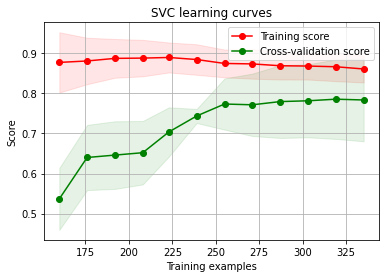

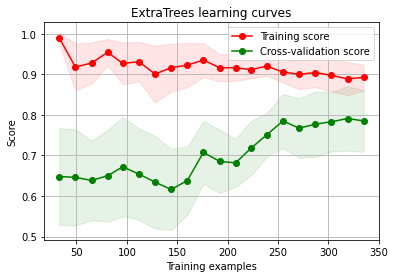

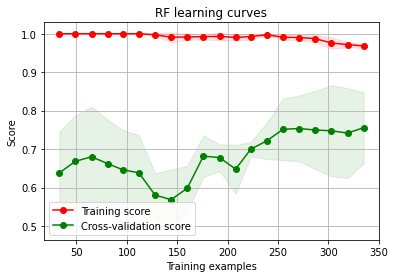

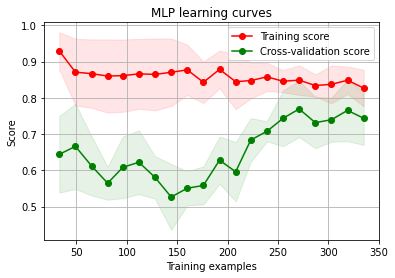

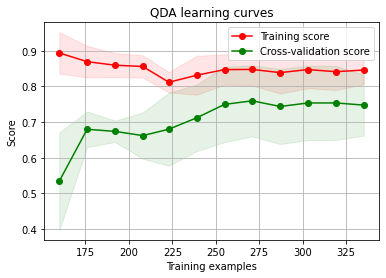

In [29]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 20)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

g = plot_learning_curve(SVMC_best,"SVC learning curves",X_train,y_train,cv=kfold)
plt.savefig('SVC_lerningcurve.png')
g = plot_learning_curve(ExtC_best,"ExtraTrees learning curves",X_train,y_train,cv=kfold)
plt.savefig('ExtC_lerningcurve.png')
g = plot_learning_curve(RFC_best,"RF learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(MLPC_best,"MLP learning curves",X_train,y_train,cv=kfold)
plt.savefig('MLPC_lerningcurve.png')
g = plot_learning_curve(QDAC_best,"QDA learning curves",X_train,y_train,cv=kfold)

In [ ]:
results = pd.Series(ExtC_best.predict(X_test),name="Predictions")
results.to_csv("Gr19_Predictions.csv",index=False)

In [ ]:
result = ExtC_best.predict(X_test)
print(result)
ones_ratio=0
zero_ratio=0
for i in result:
    if i==1:
        ones_ratio += 1
    else:
        zero_ratio += 1
print('ratio of 1s: ', ones_ratio/len(result))
print('ratio of 0s: ', zero_ratio/len(result))

First model 
[0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1.
 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0.
 1. 1. 0.]

Second model 
[0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1.
 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1.
 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.
 1. 1. 0.]